Importing all the necessary libraries


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets

Loading the datasets with only two feature columns and concatenating one intercept column

In [118]:
iris=datasets.load_iris()
X=iris.data[:, :2]
y=(iris.target!=0)*1
t=y
y=y.reshape((150,1))
intercept=np.ones((X.shape[0],1))
X=np.concatenate((intercept,X),axis=1)
theta=np.ones((X.shape[1],1))
print(X.shape)


(150, 3)


Scatter plot of the features for both types(type "Iris Setosa" and not "Iris Setosa", to make it a binary classification problem)

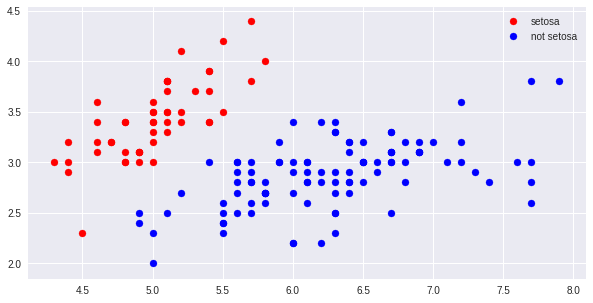

In [119]:
plt.figure(figsize=(10,5))
plt.scatter(X[t==0][:,1],X[t==0][:,2],color='r',label='setosa')
plt.scatter(X[t==1][:,1],X[t==1][:,2],color='b',label='not setosa')
plt.legend()



In [0]:
def sigmoid(z):
  return 1/(1+np.exp(-z))


In [0]:
def z(X,theta):
  return np.dot(X,theta)

In [0]:
def hyphothesis(X,theta):
  return sigmoid(z(X,theta))

Cost function with intial cost printed

In [123]:
def cost(X,theta,y):
  h=hyphothesis(X,theta)
  first = (-y).T.dot(np.log(h))
  second = (1 - y).T.dot(np.log(1 - h))
  return (np.sum(first - second) / (len(X)))
print(cost(X,theta,y))

3.141405428635322


In [0]:
def gradient(theta,X,y):
  error=sigmoid(X.dot(theta))-y
  return X.T.dot(error)/len(X)


Using gradient descent to minimize the cost

In [125]:
def train(theta,X,y):
  alpha=0.0001
  iterations=3000000
  for iteration in range(iterations):
     theta=theta-alpha*gradient(theta,X,y)
  return theta
theta=train(theta,X,y)
print(theta)
print(cost(X,theta,y))

[[-0.84314411]
 [ 4.21372344]
 [-7.02419836]]
0.05242788007905876


In [126]:
def accuracy(X,theta,y):
  h=hyphothesis(X,theta)
  predictions=(h>=0.5)*1
  l=(predictions==y).mean()
  return l
print(accuracy(X,theta,y))


0.9933333333333333


Using sklearn 

In [127]:
iris=datasets.load_iris()
X=iris.data[:, :2]
y=(iris.target!=0)*1
from sklearn.linear_model import LogisticRegression  
log_reg=LogisticRegression(C=1e20)    
%time log_reg.fit(X,y)  

CPU times: user 1.16 ms, sys: 5 µs, total: 1.16 ms
Wall time: 1.2 ms


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
preds = log_reg.predict(X_train)
l=(preds == y).mean()
print(l)
print(log_reg.intercept_)
print(log_reg.coef_)

1.0
[-80.62725491]
[[ 31.61988897 -28.31500665]]
